# New Section

In [ ]:
!!pip install gradio==3.45.0



['Collecting gradio==3.45.0',
 '  Downloading gradio-3.45.0-py3-none-any.whl (20.2 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/20.2 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.1/20.2 MB\x1b \x1b2.6 MB/s\x1b eta \x1b0:00:08\x1b',
 '\x1b[2K     \x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.4/20.2 MB\x1b \x1b5.7 MB/s\x1b eta \x1b0:00:04\x1b',
 '\x1b[2K     \x1b━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.8/20.2 MB\x1b \x1b7.3 MB/s\x1b eta \x1b0:00:03\x1b',
 '\x1b[2K     \x1b━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b1.3/20.2 MB\x1b \x1b8.9 MB/s\x1b eta \x1b0:00:03\x1b',
 '\x1b[2K     \x1b━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b1.8/20.2 MB\x1b \x1b10.4 MB/s\x1b eta \x1b0:00:02\x1b',
 '\x1b[2K     \x1b━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b2.6/20.2 MB\x1b \x1b12.3 MB/s\x1b eta \x1b0:

In [ ]:
import gradio as gr
print(gr.__version__)


3.45.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
dataset_url = "/content/drive/MyDrive/cnn/dataset"

In [ ]:
from pathlib import Path

# Define the directory path
data_dir = Path('/content/drive/MyDrive/cnn/dataset')

# Use the glob method on the Path object
halman = list(data_dir.glob('female/*'))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2006 files belonging to 5 classes.
Using 1605 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2006 files belonging to 5 classes.
Using 401 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Other species', 'big_female', 'big_male', 'female', 'male']


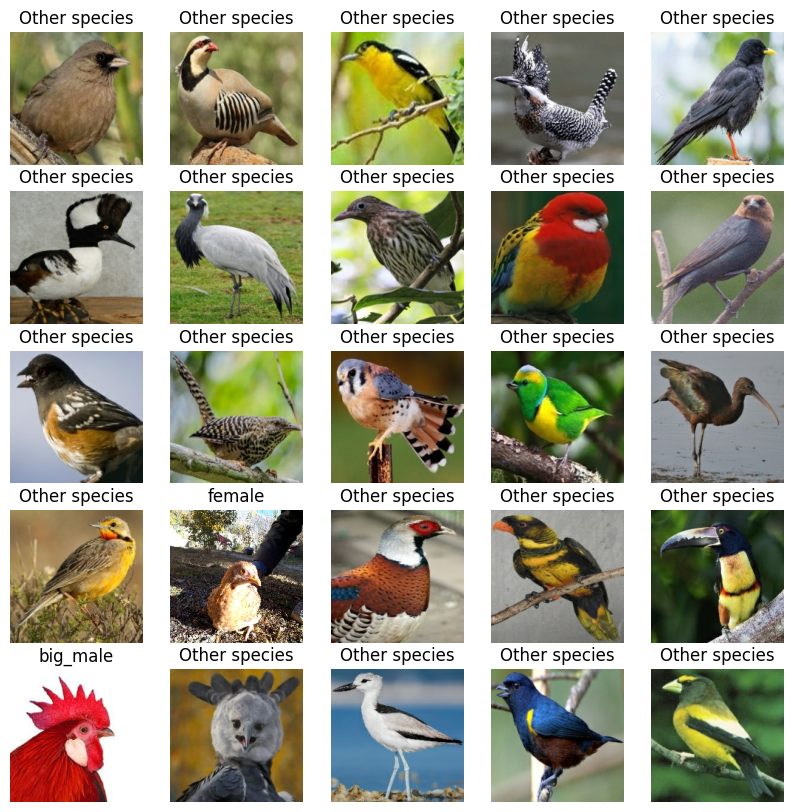

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


51/51 [==============================] - 342s 7s/step - loss: 0.7980 - accuracy: 0.7888 - val_loss: 0.3985 - val_accuracy: 0.8878
Epoch 2/10
51/51 [==============================] - 30s 506ms/step - loss: 0.3176 - accuracy: 0.9153 - val_loss: 0.2603 - val_accuracy: 0.9302
Epoch 3/10
51/51 [==============================] - 30s 513ms/step - loss: 0.1778 - accuracy: 0.9445 - val_loss: 0.2515 - val_accuracy: 0.9202
Epoch 4/10
51/51 [==============================] - 30s 517ms/step - loss: 0.1437 - accuracy: 0.9595 - val_loss: 0.3127 - val_accuracy: 0.9377
Epoch 5/10
51/51 [==============================] - 30s 523ms/step - loss: 0.0739 - accuracy: 0.9769 - val_loss: 0.2402 - val_accuracy: 0.9352
Epoch 6/10
51/51 [==============================] - 30s 526ms/step - loss: 0.0710 - accuracy: 0.9769 - val_loss: 0.2798 - val_accuracy: 0.9401
Epoch 7/10
51/51 [==============================] - 29s 492ms/step - loss: 0.0454 - accuracy: 0.9819 - val_loss: 0.2917 - val_accuracy: 0.9451
Epoch 8/10
5

In [ ]:
!cd /content/drive/MyDrive/cnn
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model


In [ ]:
# Replace 'my_model.h5' with the path to your saved model file
model= load_model('/content/drive/MyDrive/cnn/my_model.h5')


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True', share="True")

<ipython-input-17-d8b3f6e55079>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(180,180))
<ipython-input-17-d8b3f6e55079>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(180,180))
<ipython-input-17-d8b3f6e55079>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=5)
<ipython-input-17-d8b3f6e55079>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=5)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9488326cf0a40c93d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 7s 7s/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9488326cf0a40c93d6.gradio.live
